# 记笔记
- 第一点
- 第二点
- 第三点

In [1]:
# print("This is a book")

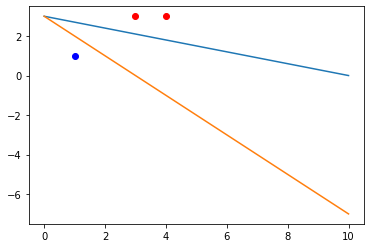

In [3]:
import numpy as np              #导入包numpy,科学计算的包，包含很多矩阵运算的功能，另起名np
from matplotlib import pyplot as plt       #从matplot 包中导入一个函数，包，pyplot并改名*/
%matplotlib inline                   
#将它作为一个inline函数，就可以在jupter 的notebook 中显示出来图形

#定义一个函数，将三个样本点画出来

def draw_pts(x,y):     #两个参数，有正样本，负样本，必须有y,画出样本点，不知道有多少个样本点，须知到样本点的维度
    for i in range(len(y)):     #循环画出点
        if y[i] == 1:              #判断是正样本还是负样本，通过Y来判断
            
            #x第i个样本点的第0个维度，和第i个样本点的第1个维度
            
            plt.plot(x[i][0],x[i][1],'ro')               #将正样本点绘制成红色，plot 函数需要两个参数x,y,对应于平面中的x,y轴
        else:
            plt.plot(x[i][0],x[i][1],'bo')               #将负样本点绘制成蓝色，
            

#分割超平面由两部分组成w,b，

#     1.初始化w,b为0的方式,感知机的原始形式

#画出这条直线，定义一个函数
def draw_line(w,b):       #画直线也是通过很多的点，所以定义很多的点横坐标0-10，
    line_x = [0,10]
    line_y = [0,0]        #先定义一个line_y,在通过W,b 求出line_y  
#     w * x + b
#     w[0] * x[0] + w[1] * x[1] + b = 0
    for i in range(len(line_x)):
        line_y[i] = (-w[0] * line_x[i] - b) / (w[1] + 1e-6)      
        # 因为w[1]，为0， 除以一个为0的数，就会在画图时，出现错误，因此可以加上一个很小的数，e-6,影响不大
        plt.plot(line_x,line_y)                          #画出点   
        

x = np.array([[3,3],[4,3],[1,1]])     #x,是一个3*2的矩阵，每一行是一个样本，每一列是样本的维度，输入三个样本点，用np定义一个矩阵
y = np.array([1,1,-1])              #y,是一维数组，前两个点是正样本，最后一个样本为负样本

# 打印y的长度,****************3
# print(len(y))

#y本身就是一个数组，同样可以通过其他的方式得到,***************(3,)3即为y的值
# print(y.shape)
# print(x.shape)           #(3, 2),三行两列的矩阵

draw_pts(x,y)            #此处的x,y是前面定义好的x,y，运行函数

    

w = [0,0]      #是一个向量
b = 0          #是一个标量
lr = 1        #定义步长的大小，即学习率的大小

#感知机原始形式
for j in range(100):       #在做100 次的过程中，如果找到了相对应的分割超平面，就不做了，跳出
    #怎么统计循环过程中，有没有误分类点，加一个统计值,每次出现一个误分类点，就加上1
    wrong_pt_cnt = 0
    for i in range(len(y)):         #此时只对每个点只做了一次，可能找不到对应的分割超平面，要对每一个点多做几次，在加一个外层循环
        #x[i]  代表第i行，即第i个样本，如果样本点满足这个条件时，就是误分类点了，就可以进行参数的更新
        if y[i] != np.sign(np.dot(w,x[i])+b):        #np.dot 函数可以求W，b的内积，判断w*x+b,    即np.sign值为正负，并比较
            w = w+lr*y[i]*x[i]
            b = b+lr*y[i]
            wrong_pt_cnt +=1


    if wrong_pt_cnt == 0:
        break

draw_line(w,b)


In [5]:
#对偶形式
gram  = np.dot(x, x.T)      #x,3*2的矩阵 x.T3*3的矩阵，相乘得到3*3的矩阵
print(x)
print(gram)

[[3 3]
 [4 3]
 [1 1]]
[[18 21  6]
 [21 25  7]
 [ 6  7  2]]


[100   0 100]


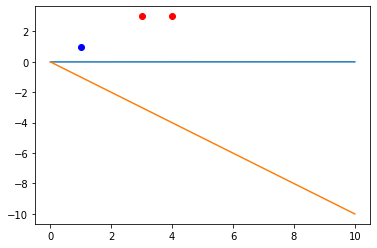

In [21]:
a = np.array([0,0,0])                 #有三个样本

for j in range(100):
    wrong_pt_cnt = 0
    for i in range(len(y)):
        c = 0
        b = 0                      #在做累加时，要先做初始化
        for k in range(len(y)):
            c += a[k] * y[k] * gram[k][i]
            b += a[k] * y[k]
                        
        if y[i] !=np.sign(c * b):
            a[i] += 1
            wrong_pt_cnt += 1
            
    if wrong_pt_cnt == 0:
        break 
            
print(a)
  
w = [0,0]        #累加之前，进行初始化    
for k in range(len(y)):
    w += a[k] * y[k] * x[k]
    
plt.figure()                    #加一张画布
draw_pts(x,y)                #瞄点 
draw_line(w,b)